# MATH3349 / 4349 Special Topics: Computational Optimal Transport

## Project 1A: Optimal Transport with Linear Programming

$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This project we solve the discrete optimal transport problem 
problem (with measures that are sums of Diracs) using linear
programming.

In [ ]:
import numpy as np
import scipy.optimize
import scipy.sparse
import matplotlib.pyplot as plt

# Part 1: Discrete distributions in $\RR^2$

Consider two dicrete distributions
$$ \al = \sum_{i=1}^n a_i \de_{x_i} \qandq 
   \be = \sum_{j=1}^m b_j \de_{y_j}. $$
   
where $n,m$ are the number of points, $\de_x$ is the Dirac at
location $x \in \RR^d$, and $(x_i)_i, (y_j)_j$ are the positions of the diracs in $\RR^2$.

First we set the number of points $(n,m)$ in the two clouds

In [ ]:
n = 50
m = 40

Generate the point clouds $X=(x_i)_i$ and $Y=(y_j)_j$. We use ```np.random.randn``` to generate normally distributed random numbers.

In [ ]:
np.random.seed(2) # We set the random seed to get the same results each time we run this

# Returns a 2 x num sized array of normally distributed numbers
def random_normal(num, scale, mean):
    return  scale * np.random.randn(2, num) + np.tile(mean, (num,1)).T

X = np.hstack((random_normal(int(n/2),1.,[-1.,1.4]), random_normal(int(n/2),.8,[-1.4,-1.2])))

Y = np.hstack((random_normal(int(m/2),.8,[1.,1.]), random_normal(int(m/2),1.,[1.4,-1.2])))

Generate the weights $a,b$.

In [ ]:
normalize = lambda a: a/np.sum(a)

a = normalize(np.random.rand(n, 1))
b = normalize(np.random.rand(m, 1))

Helper function for display of point cloud measures.

In [ ]:
# Nice colours
c1 = '#2ca02c' # Forest green
c2 = '#ff7f0e' # Burnt orange

def myplot(x,y,weight,col,alpha=None): 
    plt.scatter(x,y, s=weight*20, edgecolors="k", c=col, linewidths=1, alpha=alpha)

Display the point clouds.
The size of each dot is proportional to its probability density weight.

In [ ]:
plt.figure(figsize = (10,7))
plt.axis("off")

for i in range(len(a)):
    myplot(X[0,i], X[1,i], a[i]*len(a)*10, c1)
    
for j in range(len(b)):
    myplot(Y[0,j], Y[1,j], b[j]*len(b)*10, c2)
    
plt.show()

We compute the cost matrix $C_{i,j} := \norm{x_i-y_j}^p$ for whatever $p$ we want

## Task 1: Complete the ```distance_matrix``` routine below.

It must take the full list of points ```X``` and ```Y``` and calculate the full distance in one go.

In [ ]:
def distance_matrix(x, y, p=2):
    ### TASK : FILL IN THIS CODE

C = distance_matrix(X,Y)

# Lets test a few random entries (note that if you change p - you must change it in the norm below)
for k in range(4):
    i_test = np.random.choice(range(n))
    j_test = np.random.choice(range(m))

    print(f'C_ij = {C[i_test, j_test]}, || x_i - y_i || = {np.linalg.norm(X[:, i_test] - Y[:, j_test])**2}')

Define the set of discrete couplings between $\al$ and $\be$

$$ U(a,b) := \enscond{ P \in \RR_+^{n \times m} }{
     \forall i, \sum_j P_{i,j} = a_i, \:
     \forall j, \sum_i P_{i,j} = b_j }. $$
     
This can be represented as a linear program. We require 

$$
\begin{bmatrix} P \mathbb{1}_m \\ P^T \mathbb{1}_n  \end{bmatrix} = \begin{bmatrix} a \\ b \end{bmatrix},
$$

but we need to represent this in the form $Ax = b$, where $x$ is the vector we're optimising. Here, $P$ is a matrix that we want to optimise though, and we want to optimise $\langle C, P \rangle_F$...

So, we flatten the matrices to vectors for this problem to work in the scipy linear programming solver (unlike, for example, CVXOPT that can take matrix arguments). If ```p = P.flatten()``` and ```c = c.flatten()``` then we have that 

$$
\langle C, P \rangle_F = \langle c, p \rangle = c^T p
$$

where we interchangeably write $\langle x, y \rangle$ and $x^T y$ to mean the $\ell^2$ dot product between two vectors in the same space $\RR^n$.

First - see what happens when we apply NumPy's ```flatten()``` command to a matrix.

In [ ]:
A = np.arange(9).reshape((3,3)) # 0 to 8 in a 3x3 matrix

print(f'If A = \n{A}\n')

print(f'Then A.flatten() = \n{A.flatten()}')

So, note that NumPy's ```flatten()``` command flattens by row, so that ```P.flatten()``` gives the vector 

$$
p^T = \begin{bmatrix}
P_{1,1} & P_{1, 2} & \cdots & P_{1, m} & P_{2, 1} & \cdots & P_{2, m} & \cdots & P_{n, 1} & \cdots & P_{n, m}
\end{bmatrix}
$$

and

$$
P_{i, j} = p_{i \times n + j} \quad\text{and}\quad C_{i, j} = c_{i \times n + j}
$$

so $p, c \in \RR^{nm}$. We want to construct matrices, which we'll call $S \in \RR^{n \times nm}$ and $T \in \RR^{m \times nm}$, which act like $\mathbb{1}_m$ and $\mathbb{1}_n$ respectively, that is that give us

$$ S p = P \mathbb{1}_m = a \quad \text{and} \quad T p = P^T \mathbb{1}_n = b.$$ 

## Task 2: What are the entries of $S \in \RR^{m \times nm}$ and $T \in \RR^{n \times nm}$?

## Task 3: Implement $S$ and $T$ below

Note that for speed, you should use sparse matrices. We use ```scipy.sparse``` and the ```lil``` format matrix.

In [ ]:
S = scipy.sparse.lil_matrix((n, n*m), dtype=np.int8)
T = scipy.sparse.lil_matrix((m, n*m), dtype=np.int8)

## TASK: Fill in the entries of S and T correctly

### Testing $S$ and $T$

Given some $P \in \RR^{n \times m}$, we can test that these matrices $S$ and $T$ work properly by ensuring that

$$
S p = P \mathbb{1}_m  \quad \text{and} \quad T p = P^T \mathbb{1}_n 
$$

That test been implemented below where test whether $\| S p - P \mathbb{1}_m \| = 0$ and $\| T p - P^T \mathbb{1}_n \| = 0$. This is implemented for some randomly generated $P$ named ```test_P```, noting that $p$ is given by ```P.flatten()```, and we compute

```
np.linalg.norm( S @ test_P.flatten() - test_P @ np.ones(m) )
np.linalg.norm( T @ test_P.flatten() - test_P.T @ np.ones(m) )
```

In [ ]:
do_P_test = True # Set this to False to not do the check that your P is correct

if do_P_test is True:
    # Generate a random test
    test_P = np.random.random((n, m))

    print(f'm = {m}, and test_P.sum(axis=0).shape = {test_P.sum(axis=0).shape}')
    print(f'n = {n}, and test_P.sum(axis=1).shape = {test_P.sum(axis=1).shape} \n')

    print(f'|| S p - P 1_m ||   = {np.linalg.norm(S @ test_P.flatten() - test_P @ np.ones(m))} \n')
    print(f'|| T p - P^T 1_n || = {np.linalg.norm(T @ test_P.flatten() - test_P.T @ np.ones(n))}')

## Using linear programming to solve optimal transport

The Kantorovic formulation of the optimal transport problem reads

$$ 
P^\star \in \uargmin{P \in U(a,b)} \sum_{i,j} C_{i,j} P_{i,j} 
= \uargmin{P \in U(a,b)} \langle C, P \rangle_F.
$$

We'll solve it using ```scipy.optimize.linprog``` (documentation here https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html).

We must translate our constraints and cost in the appropriate way to use it. This will use the matrices ```S```, ```T```, and the vectors ```a```, ```b``` and ```c```.

## Task 4: what are the correct matrix and vector arguments for the ```linprog``` routine? 

Consult the documentation and describe them here.

## Task 5: Implement the construction of the arguments and call the ```linprog``` routine in the code box below.

_Hint:_ You should be able to construct these matrices using ```vstack``` method from ```scipy.sparse``` and ```numpy```

In [ ]:
# TASK: Construct the arguments here

results = scipy.optimize.linprog( '''TASK: Fill in the arguments here ''' )

P = results.x.reshape((n, m))

primal_min = results.fun
print(f'Optimal value / W_2 distance: {results.fun}')

An optimal coupling $P^\star$ can be shown to be a sparse matrix
with less than $n+m-1$ non zero entries. An entry $P_{i,j}^\star \neq 0$
should be understood as a link between $x_{i}$
and $y_{j}$ where an amount of mass equal to $P_{i,j}^\star$ is transfered.

Check that the number of non-zero entries in $P^\star$ is $n+m-1$. Beware that we are using an interior point method here, so that entries of $P^\star$ are never exactly 0.

In [ ]:
print("Number of non-zero: %d (n + m-1 = %d)" %(len(P[P>1e-5]), n + m-1))

Display the solution coupling.

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(P, cmap='Greys')

### Display the coupling defined by optimal transportation

First we must find the indices $i,j$ where $P_{i,j}^\star$ is non-zero (or at least, not numerically too close to zero).

In [41]:
# I and J are the collection of i and j indices for which P is not close to zero. 
# They are vectors of indices of equal length
I,J = np.nonzero(P>1e-5)

# So we extract the list of nonzero entries from the plan P (a vector of equal length as I and J)
Pij = P[I,J]

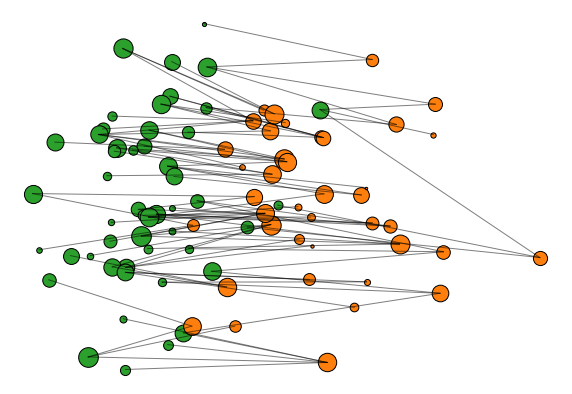

In [42]:
plt.figure(figsize = (10,7))
plt.axis('off')

for i in range(len(a)):
    myplot(X[0,i], X[1,i], a[i]*len(a)*10, c1)
for j in range(len(b)):
    myplot(Y[0,j], Y[1,j], b[j]*len(b)*10, c2)
    
# Plot the lines between the points when there is a nonzero amount in the coupling between points
for k in range(len(I)):
    h = plt.plot(np.hstack((X[0,I[k]],Y[0,J[k]])),np.hstack(([X[1,I[k]], Y[1,J[k]]])),'k', lw = 1, alpha=0.5)

plt.show()

### Testing that we have an optimal plan

There are two way we can do this:
 1. Check that we have cyclic monotonicity in the plan, so that is if we take a randomly chosen pairs of indices $(i, \sigma(i))$, such that $P_{i, \sigma(i)} \neq 0$, then $$ \sum_{i \in \mathcal{S}} C_{i,\sigma(i)} \le \sum_{i \in \mathcal{S}} C_{i, \sigma{i+1}} $$
 The code cell below will perform this.
 2. **Optional extra task** : Check that the optimal value of the dual problem is the same, i.e. that
 
 $$
\min_{P \in U(a,b)} \langle P, C \rangle_F
 = \max_{f \oplus g \le C} \langle f, a\rangle + \langle g, b \rangle
 $$
 
 This dual problem can also be written as a linear program, as we're going to be solving the optimal of
 
 $$
 \max \begin{bmatrix} a^T & b^T \end{bmatrix} \begin{bmatrix} f \\ g \end{bmatrix}
 $$
 
 where we require $f_i + g_j \le C_{i, j}$, which can be written as a linear constraint.

In [ ]:
num_tests = 5
cycle_size = 8

for test in range(num_tests):
    # First we generate a random selection from the coupling P

    cycle = np.random.choice(range(len(I)), size=cycle_size)

    optimal_cost = 0.
    permuted_cost = 0.
    for k in range(cycle_size):
        optimal_cost += C[I[cycle[k]], J[cycle[k]]]
        permuted_cost += C[I[cycle[k]], J[cycle[(k+1) % cycle_size]]]

    print(f'Test {test}: for cycle {cycle} optimal cost is {optimal_cost}, permuted cost is {permuted_cost}')

## Displacement Interpolation

For any $t \in [0,1]$, one can define a distribution $\mu_t$ such
that $t \mapsto \mu_t$ defines a geodesic for the Wasserstein metric.

Since the $W_2$ distance is a geodesic distance, this geodesic path solves the
following variational problem

$$ \mu_t = \uargmin{\mu} (1-t)W_2(\al,\mu)^2 + t W_2(\be,\mu)^2. $$
This can be understood as a generalization of the usual Euclidean
barycenter to barycenter of distribution. Indeed, in the case that
$\al = \de_{x}$ and $\be=\de_y$, one has $\mu_t=\de_{x_t}$ where $ x_t =
(1-t)x+t y $.


Once the optimal coupling $P^\star$ has been computed, the
interpolated distribution is obtained as

$$ \mu_t = \sum_{i,j} P^\star_{i,j} \de_{(1-t)x_{i} + t y_{j}}. $$

Display the evolution of $\mu_t$ for a varying value of $t \in [0,1]$.

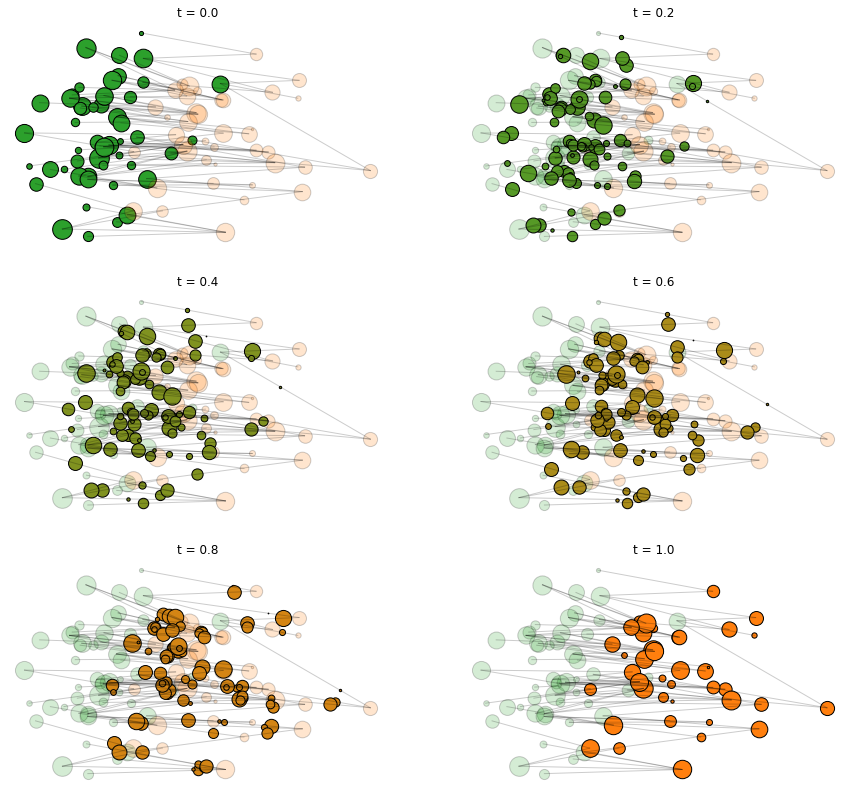

In [45]:
def hex_2_rgb(c_hex):
    return np.array([[int(c_hex.lstrip('#')[i:i+2], 16)/256 for i in (0, 2, 4)]])

num_frames = 6
plt.figure(figsize=(15,14))
tlist = np.linspace(0, 1, num_frames)
for k in range(len(tlist)):
    t = tlist[k]
    Xt = (1-t)*X[:,I] + t*Y[:,J]
    
    plt.subplot(num_frames//2, 2, k+1)
    plt.axis("off")

    for i in range(len(a)):
        if k == 0: # At the first step display a as solid
            myplot(X[0,i], X[1,i], a[i]*len(a)*10, c1)
        else:
            myplot(X[0,i], X[1,i], a[i]*len(a)*10, c1, alpha=0.2)
            
    for j in range(len(b)):
        if k == num_frames-1: # At the last setp display b as solid
            myplot(Y[0,j], Y[1,j], b[j]*len(b)*10, c2)
        else:
            myplot(Y[0,j], Y[1,j], b[j]*len(b)*10, c2, alpha=0.2)

    if k > 0 and k < num_frames-1:
        for j in range(len(Pij)):
            myplot(Xt[0,j], Xt[1,j], Pij[j]*len(Pij)*6, hex_2_rgb(c1) * (1-t) + hex_2_rgb(c2) * t, alpha=1.0)
            
    for k in range(len(I)):
        plt.plot(np.hstack((X[0,I[k]],Y[0,J[k]])),np.hstack(([X[1,I[k]], Y[1,J[k]]])),'k', lw = 1, alpha=0.2)
        
    plt.title("t = %.1f" %t) 
plt.show()